In [1]:
#import estential tool
import rdkit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
import torch_geometric
from torch_geometric.datasets import MoleculeNet
from torch_geometric.data import Data
import networkx as nx
import seaborn as sb
import sklearn
from sklearn.metrics import mean_squared_error

#for trainning
from torch_geometric.data import DataLoader
import warnings
warnings.filterwarnings("ignore")
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, global_mean_pool
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
torch.manual_seed(42)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Download dataset
data = MoleculeNet(root=".", name="ESOL")
print("Dataset features: ", data.num_features)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
data[0].x

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset features:  9
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])


tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [2]:
data[0].x

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [3]:
data[0].edge_index

tensor([[ 0,  1,  1,  2,  2,  2,  3,  3,  4,  4,  4,  5,  5,  6,  6,  7,  7,  7,
          8,  8,  9,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 14, 14, 14, 15, 15,
         16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 20, 21, 22, 22, 22, 23, 24, 24,
         24, 25, 26, 26, 26, 27, 28, 28, 28, 29, 30, 30, 30, 31],
        [ 1,  0,  2,  1,  3, 30,  2,  4,  3,  5, 26,  4,  6,  5,  7,  6,  8, 24,
          7,  9,  8, 10, 20,  9, 11, 10, 12, 14, 11, 13, 12, 11, 15, 19, 14, 16,
         15, 17, 16, 18, 17, 19, 14, 18,  9, 21, 22, 20, 20, 23, 24, 22,  7, 22,
         25, 24,  4, 27, 28, 26, 26, 29, 30, 28,  2, 28, 31, 30]])

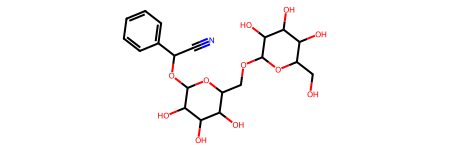

In [4]:
molecule = Chem.MolFromSmiles(data[0]["smiles"])
molecule

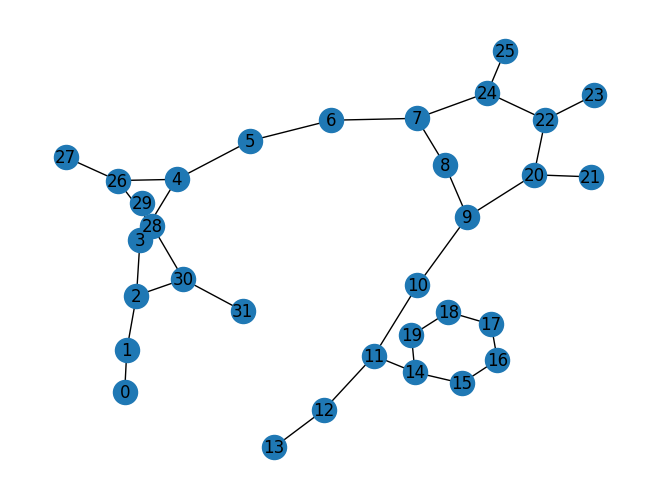

In [5]:
show = Data(x=data[0].x, edge_index=data[0].edge_index)
g = torch_geometric.utils.to_networkx(show, to_undirected=True)
nx.draw(g,pos=nx.spring_layout(g,seed = 2),with_labels=True)

In [6]:
# first model
embedding_size = 64
class GCN_first_model(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN_first_model, self).__init__()

        # define layer
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
    
        # define linear layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        
        # first layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.relu(hidden)
        # second layer
        hidden = self.conv1(hidden, edge_index)
        hidden = F.relu(hidden)
        # third layer
        hidden = self.conv2(hidden, edge_index)
        hidden = F.relu(hidden)

        # global pooling
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # apply linear layer
        out = self.out(hidden)
        return out

# second model
embedding_size = 32
class GCN_second_model(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN_second_model, self).__init__()

        # define layer
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
    
        # define linear layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        
        # first layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.relu(hidden)
        # second layer
        hidden = self.conv1(hidden, edge_index)
        hidden = F.relu(hidden)
        # third layer
        hidden = self.conv2(hidden, edge_index)
        hidden = F.relu(hidden)

        # global pooling
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # apply linear layer
        out = self.out(hidden)
        return out

# third model
embedding_size = 128
class GCN_third_model(torch.nn.Module):
    def __init__(self):
        # Init parent
        super(GCN_third_model, self).__init__()

        # define layer
        self.initial_conv = GCNConv(data.num_features, embedding_size)
        self.conv1 = GCNConv(embedding_size, embedding_size)
        self.conv2 = GCNConv(embedding_size, embedding_size)
    
        # define linear layer
        self.out = Linear(embedding_size*2, 1)

    def forward(self, x, edge_index, batch_index):
        
        # first layer
        hidden = self.initial_conv(x, edge_index)
        hidden = F.relu(hidden)
        # second layer
        hidden = self.conv1(hidden, edge_index)
        hidden = F.relu(hidden)
        # third layer
        hidden = self.conv2(hidden, edge_index)
        hidden = F.relu(hidden)

        # global pooling
        hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

        # apply linear layer
        out = self.out(hidden)
        return out


In [7]:
# setup dataset
data_size = len(data)
NUM_GRAPHS_PER_BATCH = 32
training_set = DataLoader(data[:int(data_size * 0.7)],
                    batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_set = DataLoader(data[int(data_size * 0.7):int(data_size * 0.85)],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
validation_set = DataLoader(data[int(data_size * 0.85):],
                         batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)


class EarlyStopping:
    def __init__(self, tolerance=5, min_delta=0):
        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False
        self.best_validation_loss = float('inf')

    def __call__(self, train_loss, validation_loss):
        if train_loss > (self.best_validation_loss - self.min_delta):
            self.counter = 0
            self.best_validation_loss = validation_loss

        elif  self.best_validation_loss - self.min_delta > train_loss  :
            self.best_validation_loss = validation_loss
            self.counter += 1
            print(f'case valid better case {self.counter}')
            if self.counter >= self.tolerance:
                self.early_stop = True

        else : 
            print('something wrong')



In [8]:
# setup model
loss_fn = torch.nn.MSELoss()

#first model
first_model = GCN_first_model()
optimizer_first = torch.optim.Adam(first_model.parameters(), lr=0.0007)

#second model
second_model = GCN_second_model()
optimizer_second = torch.optim.Adam(second_model.parameters(), lr=0.0007)

#second model
third_model = GCN_third_model()
optimizer_third = torch.optim.Adam(third_model.parameters(), lr=0.0007)

# training function
def train(model,optimizer,loss_fn,epochs:int=1000, is_early_stop:bool = True):
    earlystop = EarlyStopping(tolerance=7,min_delta=1)
    train_losses_epoch = []
    valid_losses_epoch = []
    stop_at_epoch = epochs
    for epoch in range(epochs):
        model = model.to(device)
        train_losses = []
        valid_losses = []

        #train step
        for batch in training_set:
            # Use GPU
            batch.to(device)
            # Reset gradients
            optimizer.zero_grad()
            # Passing the node features and the connection info
            pred  = model(batch.x.float(), batch.edge_index, batch.batch)
            # Calculating the loss and gradients
            train_loss = loss_fn(pred, batch.y)
            train_loss.backward()
            float_train_loss = float(train_loss.detach().numpy().astype(float))
            train_losses.append(float_train_loss)
            # Update using the gradients
            optimizer.step()
        
        #valid step
        model.eval()
        for batch in validation_set:
            # Use GPU
            batch.to(device)
            # Passing the node features and the connection info
            pred = model(batch.x.float(), batch.edge_index, batch.batch)
            # Calculating the loss
            valid_loss = loss_fn(pred, batch.y)
            float_valid_loss = float(valid_loss.detach().numpy().astype(float))
            valid_losses.append(float_valid_loss)
        
        #calculate average loss
        average_train_loss = sum(train_losses)/len(train_losses)
        average_valid_loss = sum(valid_losses)/len(valid_losses)
        train_losses_epoch.append(average_train_loss)
        valid_losses_epoch.append(average_valid_loss)
        earlystop(train_loss=average_train_loss, validation_loss=average_valid_loss)
        if earlystop.early_stop and is_early_stop:
            stop_at_epoch = epoch+1
            print(f'result at {epoch+1} is {earlystop.early_stop}')
            break
    test_result = test(model,loss_fn=loss_fn)
    return train_losses_epoch, valid_losses_epoch, stop_at_epoch , [test_result,train_losses_epoch[-1], valid_losses_epoch[-1]]

def test(model,loss_fn):
    test_loss_list = []
    for batch in test_set:
        batch.to(device)
        # Passing the node features and the connection info
        pred = model(batch.x.float(), batch.edge_index, batch.batch)
        # Calculating the loss
        test_loss = loss_fn(pred, batch.y)
        float_test_loss = float(test_loss.detach().numpy().astype(float))
        test_loss_list.append(float_test_loss)
    average_train_loss = sum(test_loss_list)/len(test_loss_list)
    return average_train_loss


In [9]:
train_losses, valid_losses, stop_at_epoch, result = train(model=first_model,optimizer=optimizer_first,loss_fn=loss_fn)

case valid better case 1
case valid better case 1


In [10]:
stop_at_epoch,test_result

(1000, 0.7086683809757233)

In [ ]:
train_losses, valid_losses, stop_at_epoch, test_result = train(model=first_model,optimizer=optimizer_first,loss_fn=loss_fn,is_early_stop=False)

In [59]:
test_result

0.7804011205832163

In [53]:
# train_lossed_list = [float(i.detach().numpy().astype(float)) for i in train_losses]
# valid_lossed_list = [float(i.detach().numpy().astype(float)) for i in valid_losses]

In [66]:
float(train_losses)

13.481454849243164

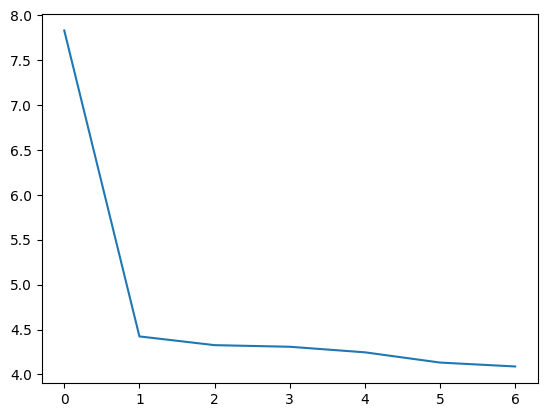

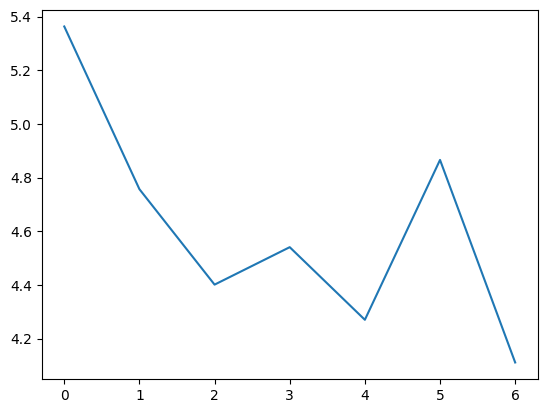

7

In [11]:
plt.figure()
plt.plot(train_losses)
plt.show()
plt.figure()
plt.plot(valid_losses)
plt.show()
stop_at_epoch


In [40]:
# # Root mean squared error
# loss_fn = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

# # Use GPU for training
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Wrap data in a data loader
# data_size = len(data)
# NUM_GRAPHS_PER_BATCH = 32
# loader = DataLoader(data[:int(data_size * 0.8)],
#                     batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
# test_loader = DataLoader(data[int(data_size * 0.8):],
#                          batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

# def train(data):
#     # Enumerate over the data
#     for batch in loader:
#       # Use GPU
#       batch.to(device)
#       # Reset gradients
#       optimizer.zero_grad()
#       # Passing the node features and the connection info
#       pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)
#       # Calculating the loss and gradients
#       loss = loss_fn(pred, batch.y)
#       loss.backward()
#       # Update using the gradients
#       optimizer.step()
#     return loss, embedding

# print("Starting training...")
# losses = []
# for epoch in range(1000):
#     loss, h = train(data)
#     losses.append(loss)
#     if epoch % 100 == 0:
#       print(f"Epoch {epoch} | Train Loss {loss} ")

Starting training...
Epoch 0 | Train Loss 4.54939603805542
Epoch 100 | Train Loss 1.5579652786254883
Epoch 200 | Train Loss 2.6277196407318115
Epoch 300 | Train Loss 0.37277689576148987
Epoch 400 | Train Loss 0.47624853253364563
Epoch 500 | Train Loss 0.7442011833190918
Epoch 600 | Train Loss 0.5013490319252014
Epoch 700 | Train Loss 0.3040367066860199
Epoch 800 | Train Loss 0.1414112150669098
Epoch 900 | Train Loss 0.5435447096824646


In [41]:
# import pandas as pd

# # Analyze the results for one batch
# test_batch = next(iter(test_loader))
# with torch.no_grad():
#     test_batch.to(device)
#     pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
#     df = pd.DataFrame()
#     df["y_real"] = test_batch.y.tolist()
#     df["y_pred"] = pred.tolist()
# df["y_real"] = df["y_real"].apply(lambda row: row[0])
# df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
# df

,y_real,y_pred
0,-2.281,-2.237818
1,-1.890,-1.250625
2,-2.461,-1.644531
3,-4.570,-3.882949
4,-1.300,-1.675418
...,...,...
59,-2.460,-2.281416
60,-1.740,-1.923831
61,-2.350,-3.024125
62,-4.310,-3.305684


[(-7.0, 2.0)]

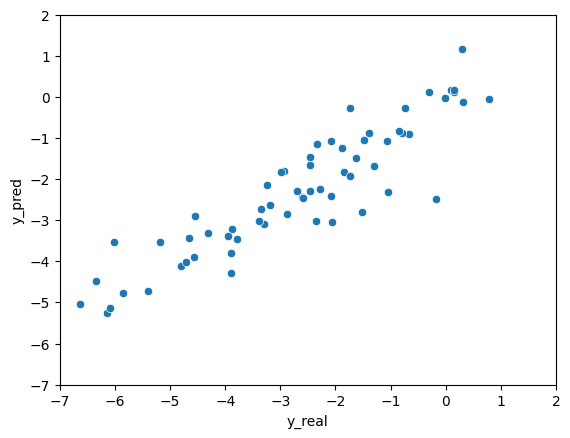

In [47]:
# plt = sb.scatterplot(data=df, x="y_real", y="y_pred")
# plt.set(xlim=(-7, 2))
# plt.set(ylim=(-7, 2))


In [53]:
# sklearn.metrics.mean_squared_error(df['y_real'], df['y_pred'])

0.8329761435263996